In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# to show all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

#### Complete Case Analysis

- Assumption: Data is missing completely at random (MCAR)
- Only use CCA when the total percentage of missing values is less than 5 percent

In [3]:
df = pd.read_csv("data/housing.csv")
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# find the variables with missing observations
vars_with_na = [var for var in df.columns if df[var].isnull().mean() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [22]:
s = df["Alley"].isnull()
type(s), s.sum(), s.mean()

(pandas.core.series.Series, 1369, 0.9376712328767123)

In [26]:
df[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [27]:
# Create a dataframe that contains the features and their missing value percentages

df_na_percent = df[vars_with_na].isnull().mean()
# convert the array to DataFrame
df_na_percent = pd.DataFrame(df_na_percent.reset_index())
# assign column names
df_na_percent.columns = ["variable", "na_percentage"]
# sort the df by missing value percentage
df_na_percent = df_na_percent.sort_values(by="na_percentage", ascending=False)

df_na_percent

,variable,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


In [28]:
# filter out the features which has the na_percentage > 5%

vars_cca = [feature for feature in df.columns if df[feature].isnull().mean()  < 0.05]
vars_cca


['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [32]:
# calculate percentage of observations with complete
# cases: i.e., with values for all the variables

# the method dropna(), discards the observations that contain
# na in any of the rows / columns

len(df[vars_cca].dropna())/len(df)

0.9671232876712329

In [34]:
# construct the new dataset with dropped columns

df_cca = df[vars_cca].dropna()
df.shape, df_cca.shape

((1460, 81), (1412, 70))

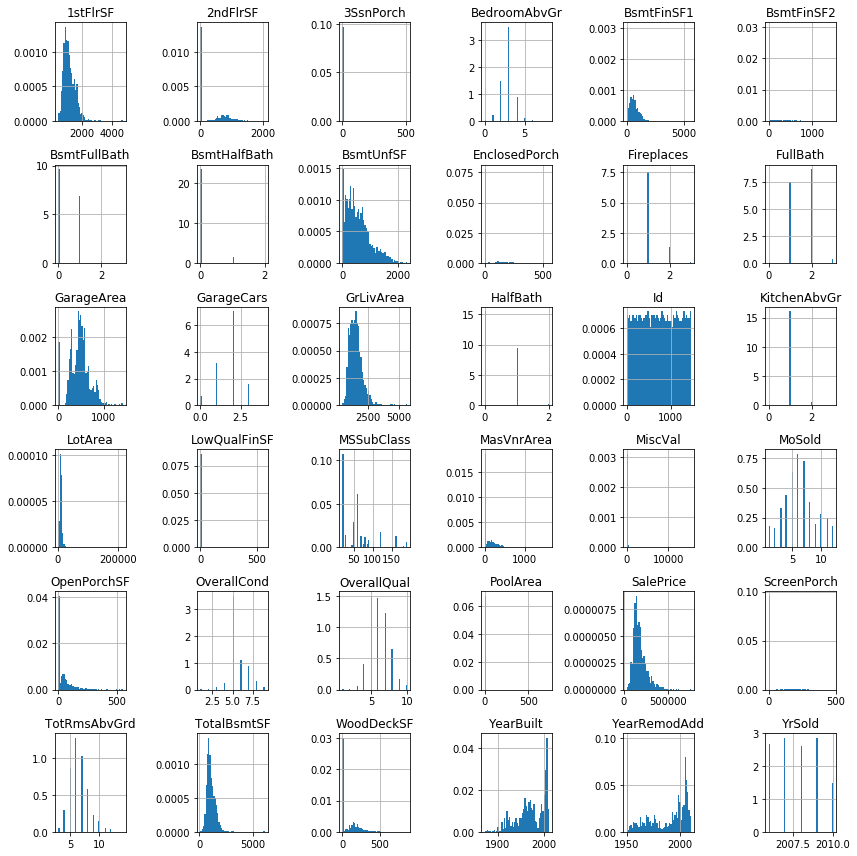

In [36]:
# plot the histograms for all numerival variables in the complete
# case dataset (as we did in section 3)

df_cca.hist(bins=50, density=True, figsize=(12, 12))
plt.tight_layout()
plt.show()

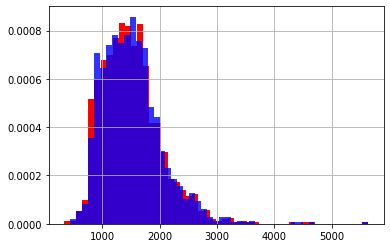

In [38]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)
plt.show();

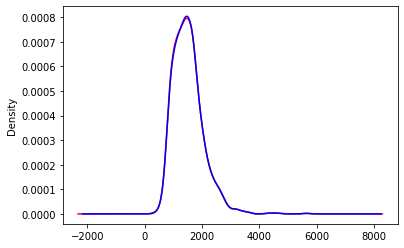

In [39]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['GrLivArea'].plot.density(color='red')

# data after cca
df_cca['GrLivArea'].plot.density(color='blue')
plt.show();

In [40]:
# the following function captures the percentage of observations
# for each category in the original and complete case dataset
# and puts them together in a new dataframe


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [41]:
# run the function in a categorical variable
categorical_distribution(df, df_cca, 'BsmtQual')

,original,cca
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


In [43]:
categorical_distribution(df, df_cca, 'MasVnrType')

,original,cca
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


In [44]:
categorical_distribution(df, df_cca, 'SaleCondition')

,original,cca
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


#### Mean/Median Imputation

- Assumption: Data is missing completely at random (MCAR)
- <b>NOTE</b>: Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [45]:
# to split the datasets
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv("data/titanic.csv", usecols=["age", "fare", "survived"])
df.shape

(891, 3)

In [48]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [49]:
df.isna().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [64]:
x_train, x_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],  # predictors
    df['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

x_train.shape, x_test.shape

((623, 2), (268, 2))

In [65]:
x_train.isnull().mean()

age     0.194222
fare    0.000000
dtype: float64

In [66]:
def impute_na(df, feature, value):
    return df[feature].fillna(value)

In [67]:
__median = x_train.age.median()
__mean = x_train.age.mean()
__mean, __median

(29.915338645418327, 29.0)

In [68]:
# median imputation
x_train["age_median"] = impute_na(x_train, "age", __median)

# mean imputation
x_train["age_mean"] = impute_na(x_train, "age", __mean)

# since age has decimals, round it to one place
x_train["age_mean"] = np.round(x_train["age_mean"], 1)
x_train.head()

,age,fare,age_median,age_mean
857,51.0,26.5500,51.0,51.0
52,49.0,76.7292,49.0,49.0
386,1.0,46.9000,1.0,1.0
124,54.0,77.2875,54.0,54.0
578,NaN,14.4583,29.0,29.9


In [69]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# high in Age, ~20%

print('Original variable variance: ', x_train['age'].var())
print('Variance after median imputation: ', x_train['age_median'].var())
print('Variance after mean imputation: ', x_train['age_mean'].var())

Original variable variance:  210.4528692463678
Variance after median imputation:  169.64401397346103
Variance after mean imputation:  169.51269265508145


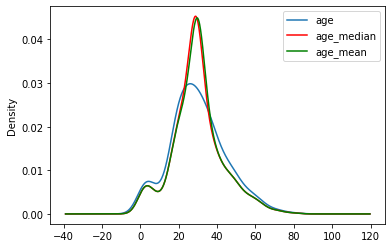

In [70]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [71]:
# we also said that mean / median imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

x_train[['fare', 'age', 'age_median', 'age_mean']].cov()

,fare,age,age_median,age_mean
fare,2328.801583,78.468894,64.684488,63.223925
age,78.468894,210.452869,210.452869,210.452848
age_median,64.684488,210.452869,169.644014,169.514865
age_mean,63.223925,210.452848,169.514865,169.512693


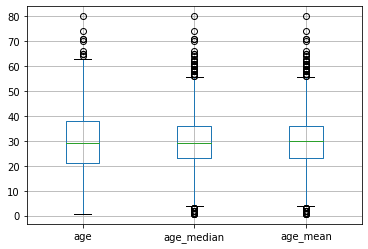

In [72]:
# Finally, I mentioned that mean / median imputation may lead 
# to observations that are normal, to look like outliers

# or in other words, mean / median imputation may lead to an increase
# in the apparent number of  outliers

# Let's find out using a boxplot
x_train[['age', 'age_median', 'age_mean']].boxplot()

In [73]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [74]:
# let's load the House Prices dataset

df = pd.read_csv('data/housing.csv', usecols=cols_to_use)
print(df.shape)
df.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [75]:
# print the variables that contain missing data

# in the next list comprehension, I loop over all the columns
# of the dataset and select those that contain missing data

[var for var in df.columns if df[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [76]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [77]:
# let's separate into training and testing set

x_train, x_test, y_train, y_test = train_test_split(
    df,                                             
    df['SalePrice'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((1022, 10), (438, 10))

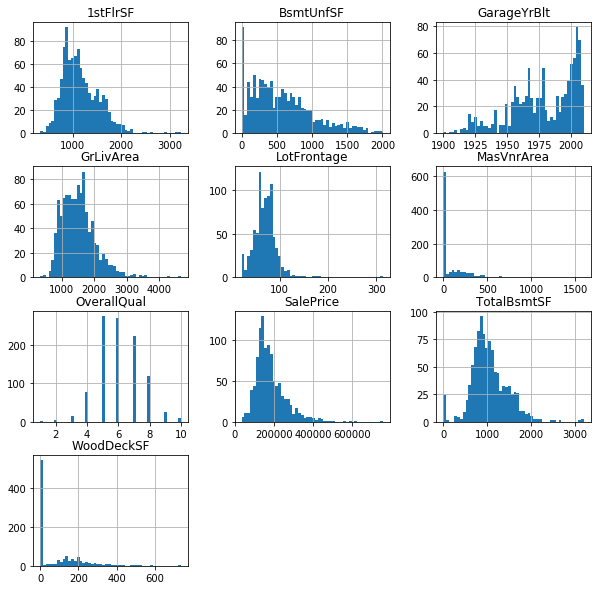

In [78]:
# let's plot the distributions of the variables
# we learnt this code in section 3 on variable characteristics
x_train.hist(bins=50, figsize=(10,10))
plt.show()

#### Arbitary Value Imputation

- Assumption: Data is not missing at random (MNAR).

- <b>NOTE:</b> Imputation should be done over the training set, and then propagated to the test set. For arbitrary value imputation this is not so important, because we chose the value arbitrarily, however it is good to adhere to this practice and select the arbitrary value by looking only at the distribution of the variables in the train set.

In [80]:
data = pd.read_csv('data/titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [81]:
# percentage of NA
data.isna().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [82]:
# let's separate into training and testing set

x_train, x_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

x_train.shape, x_test.shape

((623, 2), (268, 2))

In [83]:
x_train.isna().mean()

age     0.194222
fare    0.000000
dtype: float64

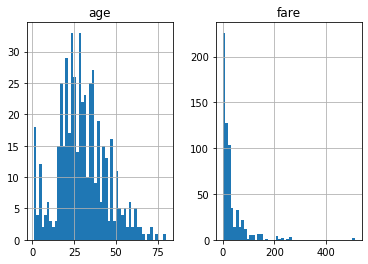

In [84]:
x_train.hist(bins=50)
plt.show();

In [85]:
# lets try to replace AGE by two arbitary values and observe the impacts

# impute by 99
x_train["age_99"] = impute_na(x_train, "age", 99)


# impute by -1
x_train["age_minus_1"] = impute_na(x_train, "age", -1)

x_train.head()

,age,fare,age_99,age_minus_1
857,51.0,26.5500,51.0,51.0
52,49.0,76.7292,49.0,49.0
386,1.0,46.9000,1.0,1.0
124,54.0,77.2875,54.0,54.0
578,NaN,14.4583,99.0,-1.0


In [86]:
# we can see a change in the variance after arbitrary value imputation
# this is expected, because the percentage of missing data is quite
# high in Age ~20%

print('Original variable variance: ', x_train['age'].var())
print('Variance after 99 imputation: ', x_train['age_99'].var())
print('Variance after -1 imputation: ', x_train['age_minus_1'].var())

Original variable variance:  210.4528692463678
Variance after 99 imputation:  917.6372579490381
Variance after -1 imputation:  319.3288446599537


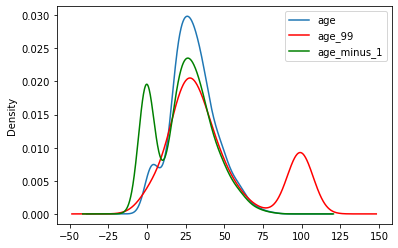

In [88]:
# we can see that the distribution has changed 
# with now more values accumulating towards the arbitrary values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['age'].plot(kind='kde', ax=ax)

# variable imputed with 99
x_train['age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
x_train['age_minus_1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, arbitrary value imputation distorts the original distribution of the variable Age. The transformed variable shows more values around arbitrary values.

**Is this important?**

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Arbitrary value imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

On the other hand, this technique works quite well with tree based algorithms.

In [89]:
# we also said that arbitrary value imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

x_train[['fare', 'age', 'age_99', 'age_minus_1']].cov()

,fare,age,age_99,age_minus_1
fare,2328.801583,78.468894,-48.531540,113.205643
age,78.468894,210.452869,210.452869,210.452869
age_99,-48.531540,210.452869,917.637258,-165.272555
age_minus_1,113.205643,210.452869,-165.272555,319.328845


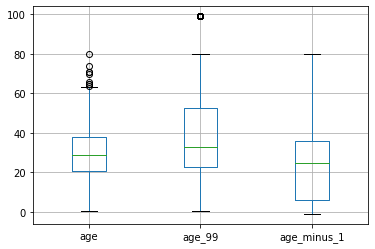

In [91]:
# Finally, I mentioned that arbitrary value imputation may
# affect the perception of outliers

# Let's find out using a boxplot
x_train[['age', 'age_99', 'age_minus_1']].boxplot()

#### End of Distribution Imputation / End of Tain Imputation

- Assumption: Data is not missing at random (MNAR).



   survived   age     fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500
(623, 2) (268, 2)
Missing Value Percentage in Training set: age     0.194222
fare    0.000000
dtype: float64


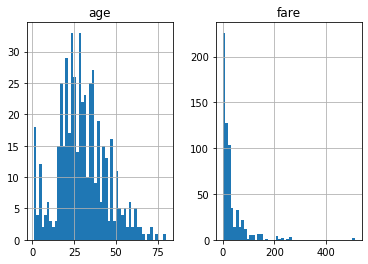

In [92]:
# Since the process is a bit streamlined, lets have all preprocessing in one cell
data = pd.read_csv('data/titanic.csv', usecols=['age', 'fare', 'survived'])
print(data.head())

# let's separate into training and testing set
x_train, x_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

print(x_train.shape, x_test.shape)
print(f"Missing Value Percentage in Training set: {x_train.isna().mean()}")

x_train.hist(bins=50)
plt.show();


In [93]:
#### IMPUTATION

# far end of distribution

# because age looks approximately Gaussian, we can use mean and std for getting the imputation value
I = x_train.age.mean() + 3 * x_train.age.std()
I

73.43632005918369

In [94]:
# replace the na with I

x_train["age_imputed"] = impute_na(x_train, "age", I)
x_train.head()

,age,fare,age_imputed
857,51.0,26.5500,51.00000
52,49.0,76.7292,49.00000
386,1.0,46.9000,1.00000
124,54.0,77.2875,54.00000
578,NaN,14.4583,73.43632


In [95]:
# we can see a change in the variance after end of tail imputation
# this is expected, because the percentage of missing data is quite
# high in Age ~20%

print('Original variable variance: ', x_train['age'].var())
print('Variance after 99 imputation: ', x_train['age_imputed'].var())

Original variable variance:  210.4528692463678
Variance after 99 imputation:  466.4111899213171


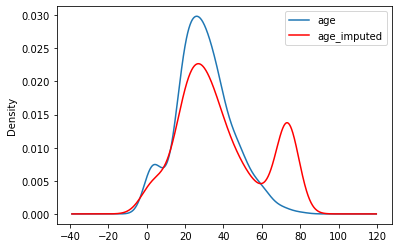

In [96]:
# we can see that the distribution has changed 
# with now more values accumulating towards the tail

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['age'].plot(kind='kde', ax=ax)

# imputed variable
x_train['age_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')